CLUSTERING - DBSCAN

il DBSCAN è un algoritmo di clustering basato sulla densità: dato un insieme di punti in uno spazio, raggruppa insieme i punti che sono densi abbastanza da essere considerati appartenenti allo stesso cluster. DBSCAN è uno degli algoritmi di clustering più comuni ed è anche il più citato in letteratura scientifica. 

 - https://it.wikipedia.org/wiki/Dbscan

DBSCAN usa una definizione di cluster basata sulla nozione di densità.

Un punto q è direttamente raggiungibile da un altro punto  p se la distanza fra essi è minore di un ε fissato (cioè, se q è parte del cosiddetto ε-vicinato di p; ovviamente tale relazione è simmetrica). Se nell' ε-vicinato di p è presente un numero minimo M di punti, p p è detto un nucleo (core point). Più precisamente, nel formalismo di DBSCAN si parla di raggiungibilità diretta solo da un nucleo ad altri punti, e non viceversa, e dunque a rigore la raggiungibilità diretta non è più una relazione simmetrica. 

Un cluster, che è un sotto-insieme dei punti dell'insieme di dati, soddisfa due proprietà:

    Tutti i punti all'interno del cluster sono mutuamente connessi per densità.
    Se un punto è raggiungibile per densità da un altro punto del cluster, anch'esso è parte del cluster.


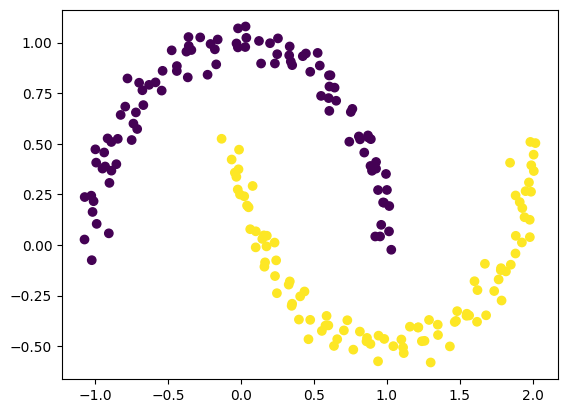

In [14]:
# realizziamo un clustering con DBScan
# DBScan è un algoritmo di clustering density-based
# DBScan è un algoritmo di clustering non parametrico
# importiamo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# carichiamo un dataset di esempio
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# visualizziamo il dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

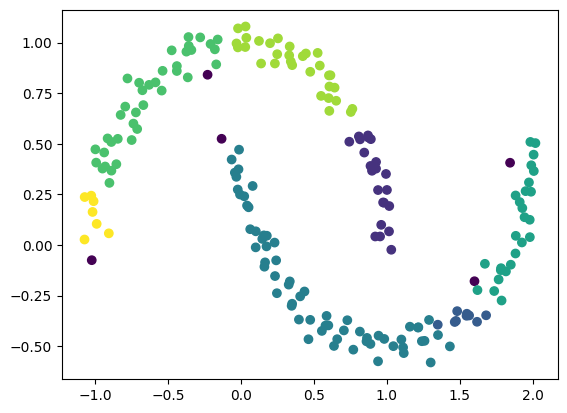

In [15]:
# creiamo il modello
dbscan = DBSCAN(eps=0.12, min_samples=5)

# addestriamo il modello
dbscan.fit(X)

# visualizziamo le predizioni
pred = dbscan.labels_
plt.scatter(X[:,0], X[:,1], c=pred)
plt.show()


Ogni processo di data mining ha il problema dei parametri. Ogni parametro influenza l'algoritmo in modo specifico. Per il DBSCAN i parametri epsilon e MinPnts sono necessari. I parametri devono essere specificati dall'utente dato che ogni data set richiede parametri differenti. Un valore iniziale per ε può essere determinato come un k-distance graph. Come regola generale, k può essere derivato dal numero di dimensioni nel data set D come k = | D | + 1. Tuttavia valori maggiori sono generalmente migliori per data set con rumore. 

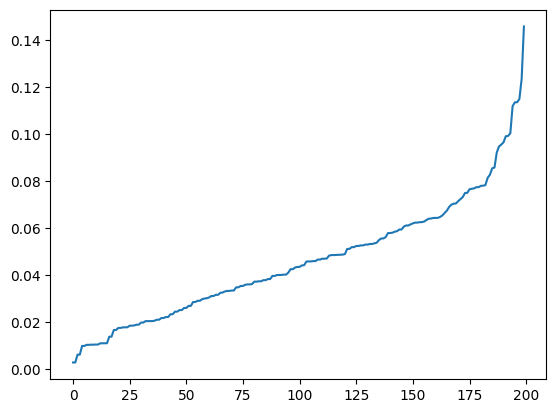

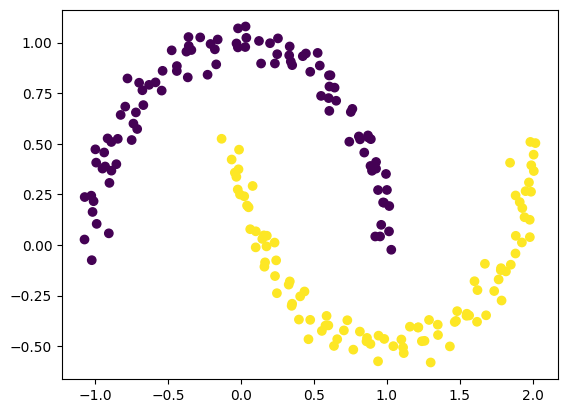

In [34]:
# determiniamo il k-distance graph per determinare il valore di eps (epsilon) e min_samples
from sklearn.neighbors import NearestNeighbors

# creiamo una funzione per determinare il valore di eps (epsilon)
def k_dist_plot(data, k):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()

    return {'eps': max(distances), 'min_samples': data.shape[1] + 1}

# visualizziamo i migliore valori di eps (epsilon) e min_samples
best_value = k_dist_plot(X, 2)

# creiamo il modello
dbscan = DBSCAN(eps=best_value['eps'], min_samples=best_value['min_samples'])

# addestriamo il modello
dbscan.fit(X)

# visualizziamo le predizioni
pred = dbscan.labels_
plt.scatter(X[:,0], X[:,1], c=pred)
plt.show()


